# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">EDA for Forest Fire Dataset - Utkarsh Gaikwad</p>

## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the dataset</p>

## Reading Dataset from pandas

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"
df = pd.read_csv(url, header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [2]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [3]:
df.shape

(246, 14)

## Dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Data Cleaning</p>

## Checking Missing Values in dataset

In [5]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[122:123,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)

In [8]:
df.loc[:122,'region'] = 'Bejaia'
df.loc[123:,'region'] = 'Sidi Bel-abbes'

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [10]:
df = df.drop(index = 123 , axis=0)

In [11]:
df = df.reset_index(drop=True)

## Dropping the null values as they are very less

In [12]:
df = df.dropna(axis=0)

In [13]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [14]:
df.shape

(243, 15)

## Check Duplicates

In [15]:
df.duplicated().sum()

0

No Duplicates found

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

## Changing the datatypes of variables

In [17]:
for i in ['day', 'month', 'year', 'Temperature', ' RH', ' Ws']:
    df[i] = df[i].astype(int)

In [18]:
for i in ['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[i] = df[i].astype(float)

In [19]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region          object
dtype: object

## Datatypes now converted into proper format

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis</p>

## Descriptive Statistics

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [21]:
df['Classes  '].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes  , dtype: int64

In [22]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Whitespaces observed in Classes 

In [23]:
df['Classes  '] = df['Classes  '].apply(lambda s:s.strip())

In [24]:
df['Classes  '].unique()

array(['not fire', 'fire'], dtype=object)

## Temperature Time Series Plot for Bajaia Region

<Axes: title={'center': 'Temperature Time Series plot Bajaia'}, xlabel='day_no', ylabel='Temperature'>

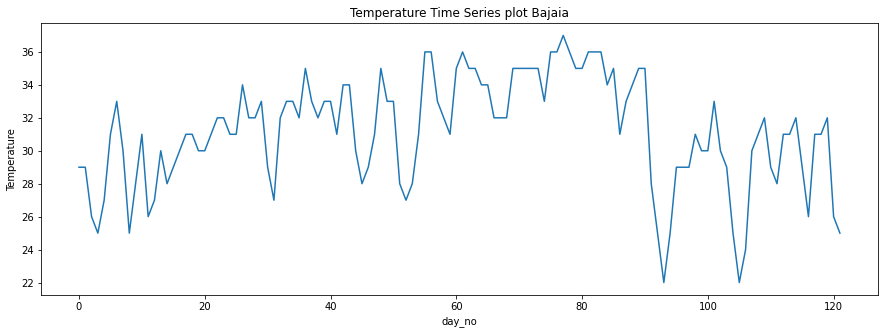

In [25]:
df[df.region=='Bejaia']['Temperature'].plot(kind='line',
                                            xlabel='day_no',
                                            ylabel='Temperature',
                                            title='Temperature Time Series plot Bajaia',
                                            figsize=(15,5))


<Axes: title={'center': 'Temperature Time Series plot Sidi Bel-abbes'}, xlabel='day_no', ylabel='Temperature'>

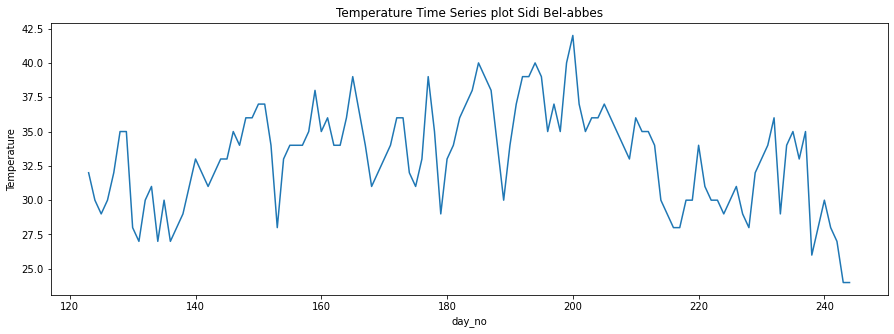

In [26]:
df[df.region!='Bejaia']['Temperature'].plot(kind='line',
                                            xlabel='day_no',
                                            ylabel='Temperature',
                                            title='Temperature Time Series plot Sidi Bel-abbes',
                                            figsize=(15,5))

## Histplot of Temperatures

In [27]:
# Creating function for histplot
import seaborn as sns
import matplotlib.pyplot as plt
def create_histograms(df,feature,hue):
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    plt.subplot(121)
    sns.histplot(data=df,x=feature,kde=True,bins='fd',color='g')
    plt.title(f'Histogram for Feature : {i}')
    plt.subplot(122)
    plt.title(f'Histogram for Feature : {i} with Hue')
    sns.histplot(data=df,x=feature,kde=True,bins='fd',hue=hue)
    plt.show()

In [28]:
numerical_cols = list(df.select_dtypes(exclude='object'))
numerical_cols

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [29]:
numerical_cols = numerical_cols[3:]

In [30]:
numerical_cols

['Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']


Histogram Plot for : Temperature



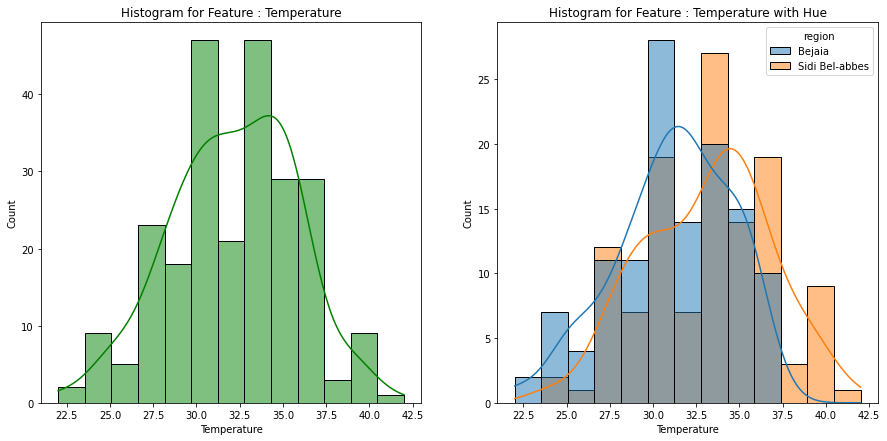




Histogram Plot for :  RH



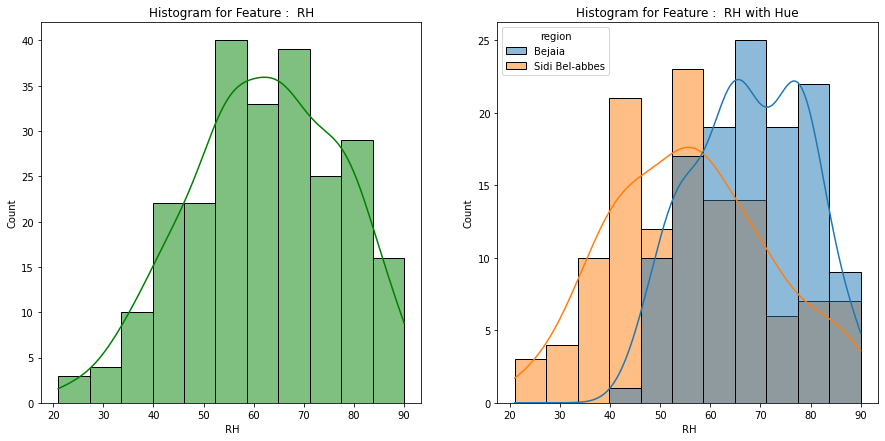




Histogram Plot for :  Ws



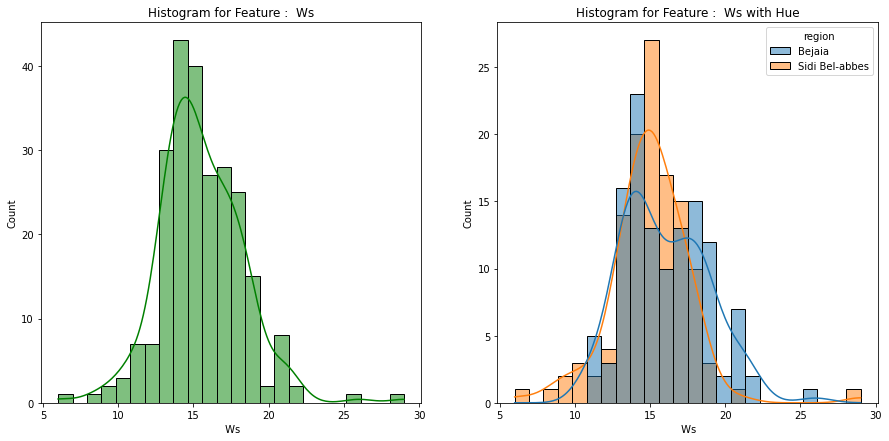




Histogram Plot for : Rain 



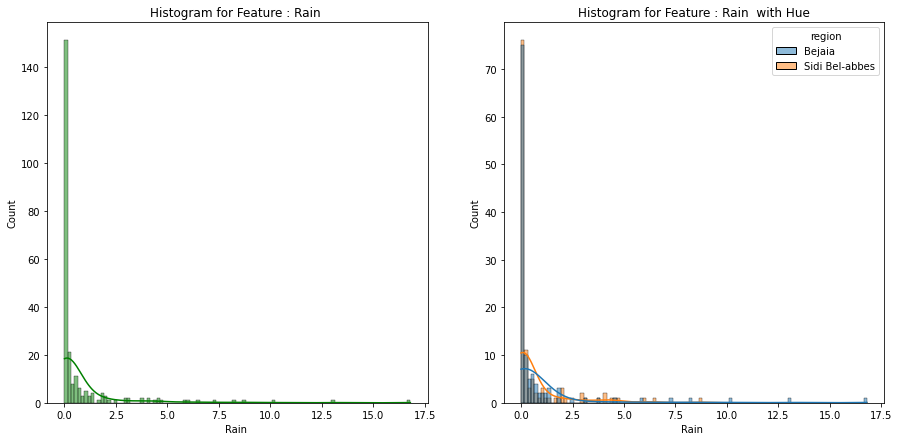




Histogram Plot for : FFMC



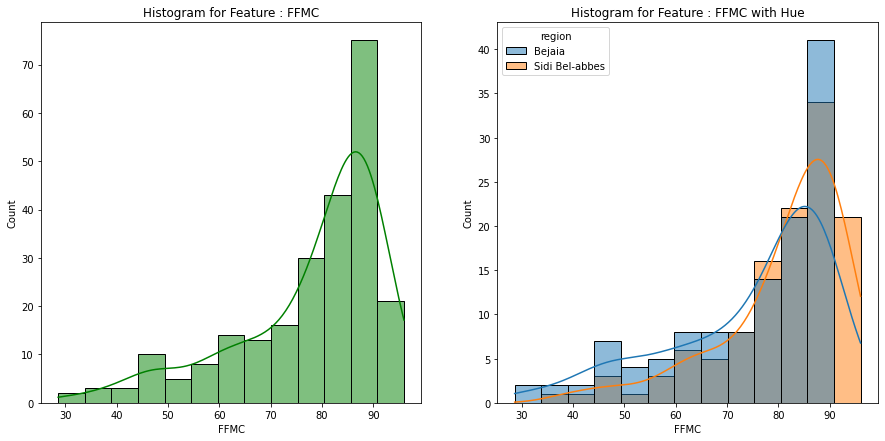




Histogram Plot for : DMC



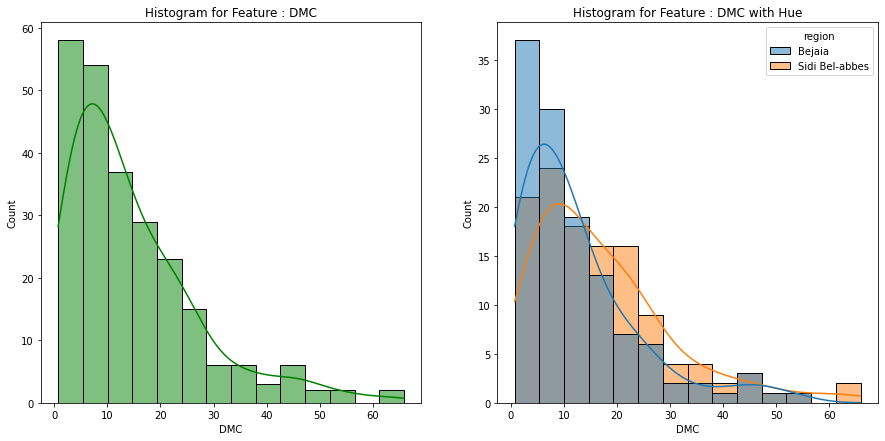




Histogram Plot for : DC



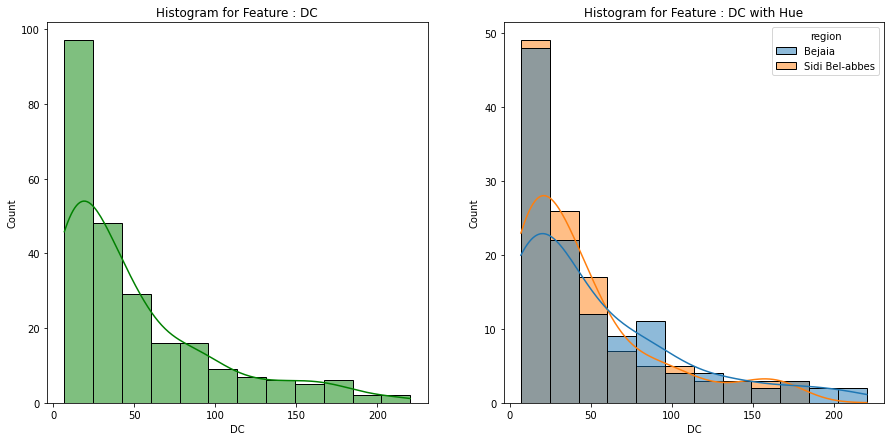




Histogram Plot for : ISI



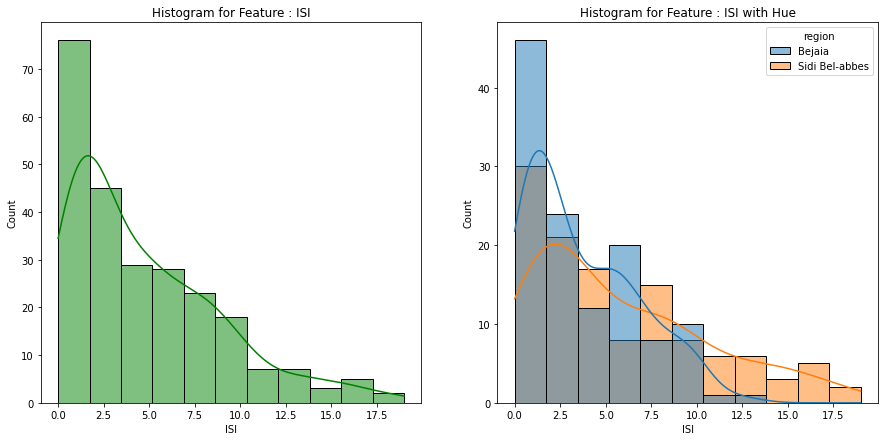




Histogram Plot for : BUI



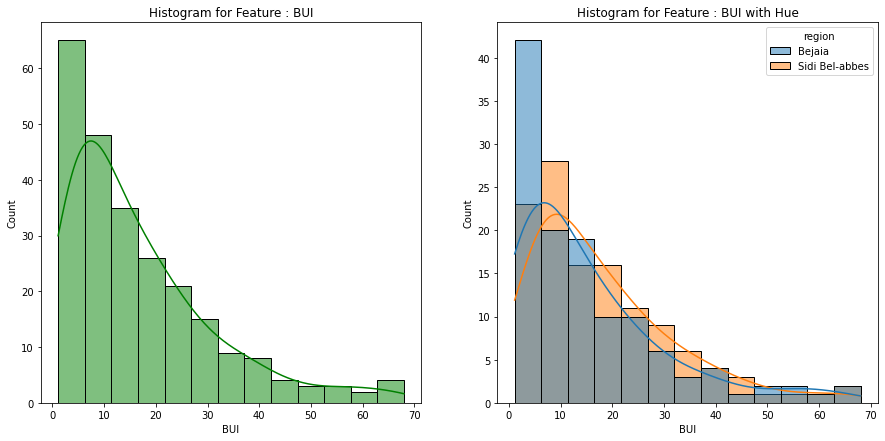




Histogram Plot for : FWI



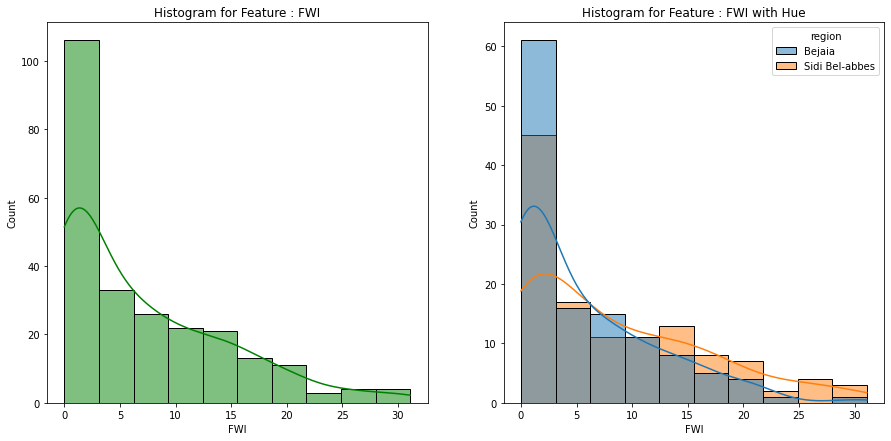

In [31]:
for i in numerical_cols:
    print(f'\nHistogram Plot for : {i}\n')
    create_histograms(df,feature=i,hue='region')
    print('\n'+'='*150 + '\n')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
def create_detailed_histogram(df, feature, hue):
    plt.subplots(1,3,figsize=(25,6))
    plt.subplot(131)
    sns.histplot(data=df, x=feature,kde=True,bins='fd',hue=hue)
    plt.title('All Regions')
    plt.subplot(132)
    sns.histplot(data=df[df['region']=='Bejaia'],x=feature,kde=True,bins='fd',hue=hue)
    plt.title('Bejaia Region')
    plt.subplot(133)
    sns.histplot(data=df[df['region']!='Bejaia'],x=feature,kde=True,bins='fd',hue=hue)
    plt.title('Sidi Bel-abbes Region')
    plt.show()


Histogram Plot for : Temperature



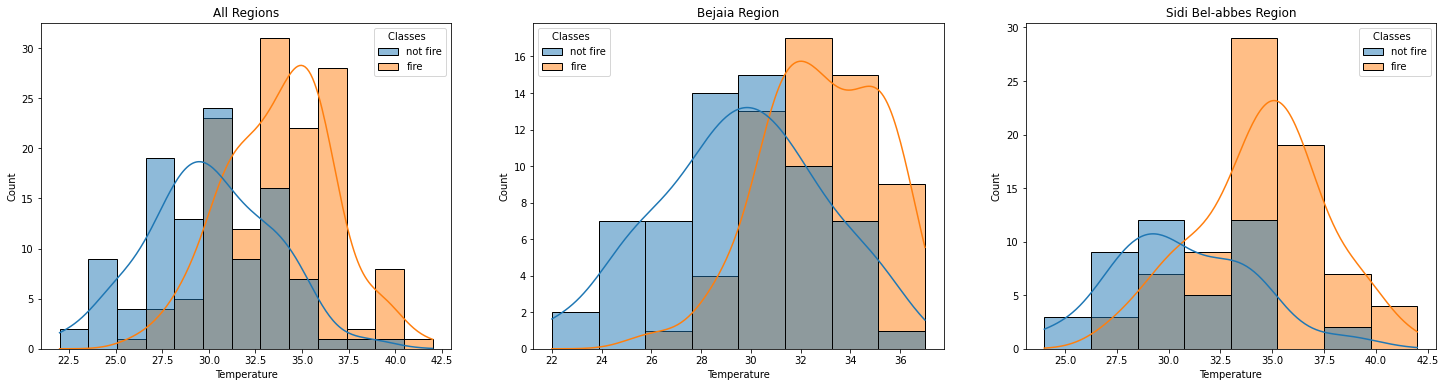




Histogram Plot for :  RH



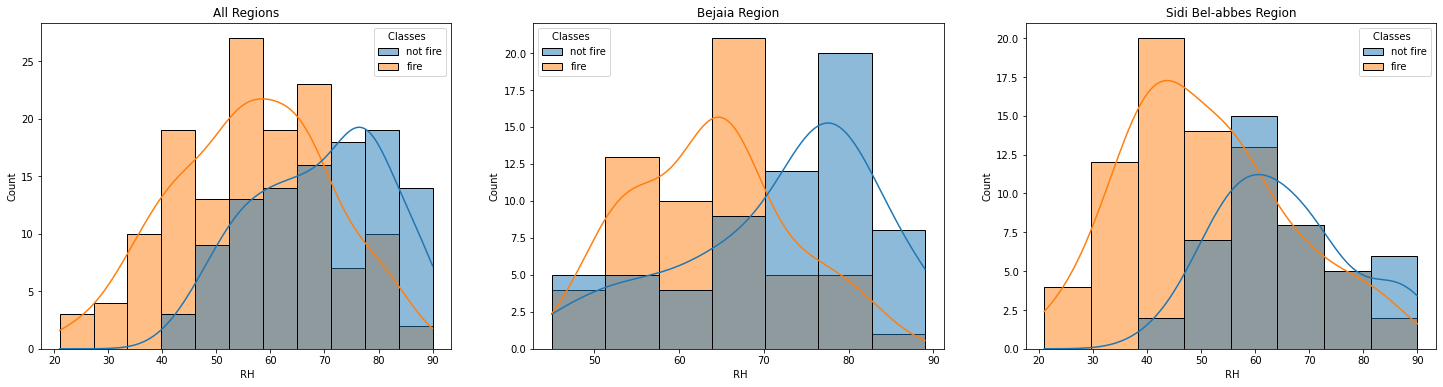




Histogram Plot for :  Ws



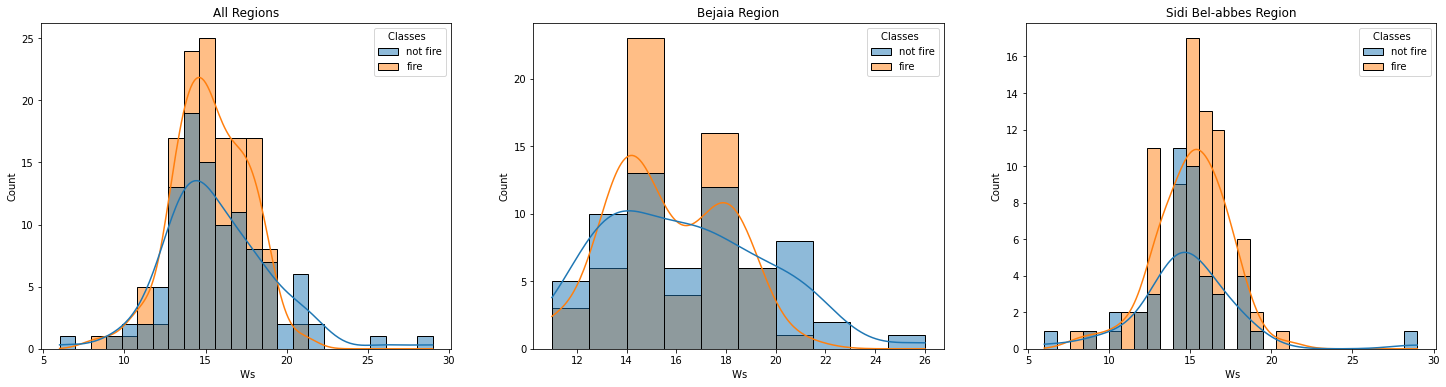




Histogram Plot for : Rain 



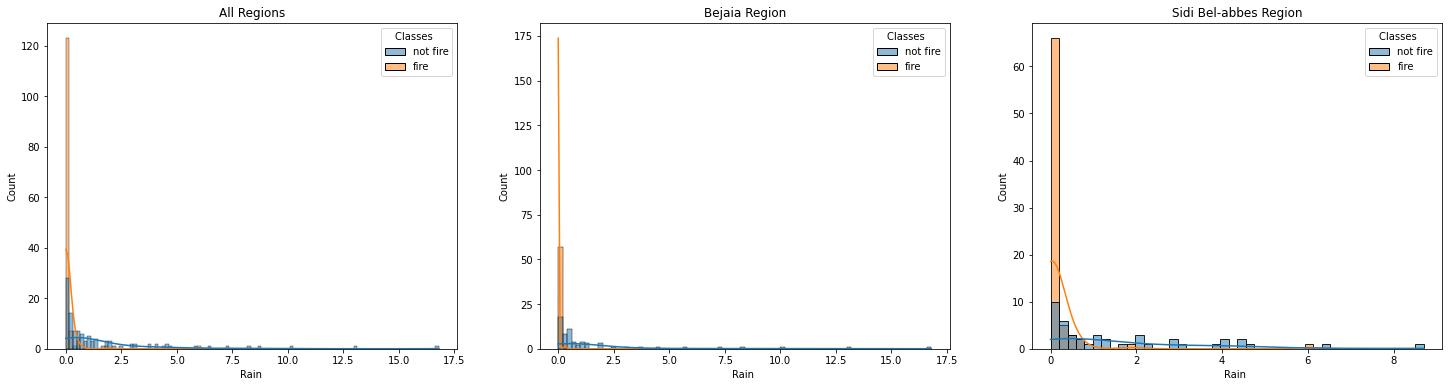




Histogram Plot for : FFMC



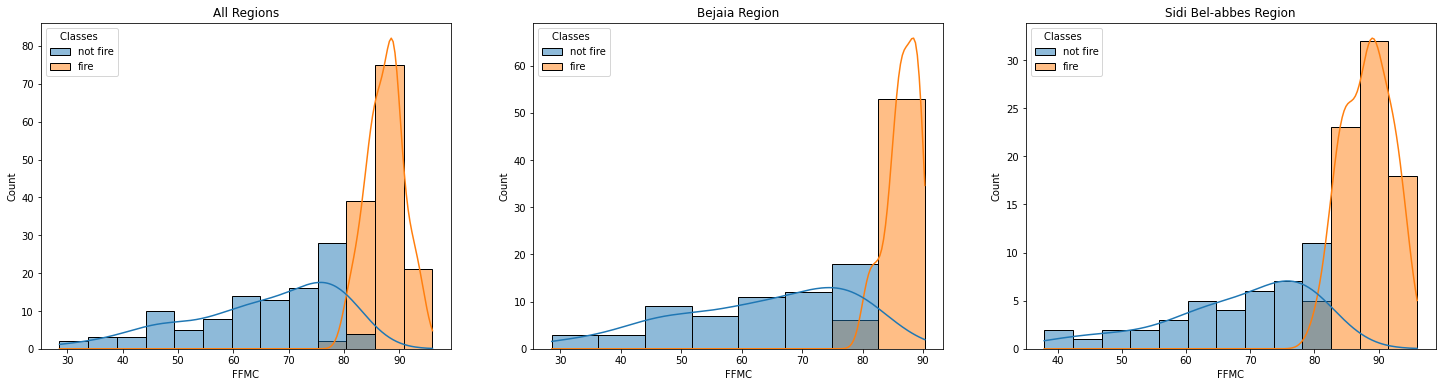




Histogram Plot for : DMC



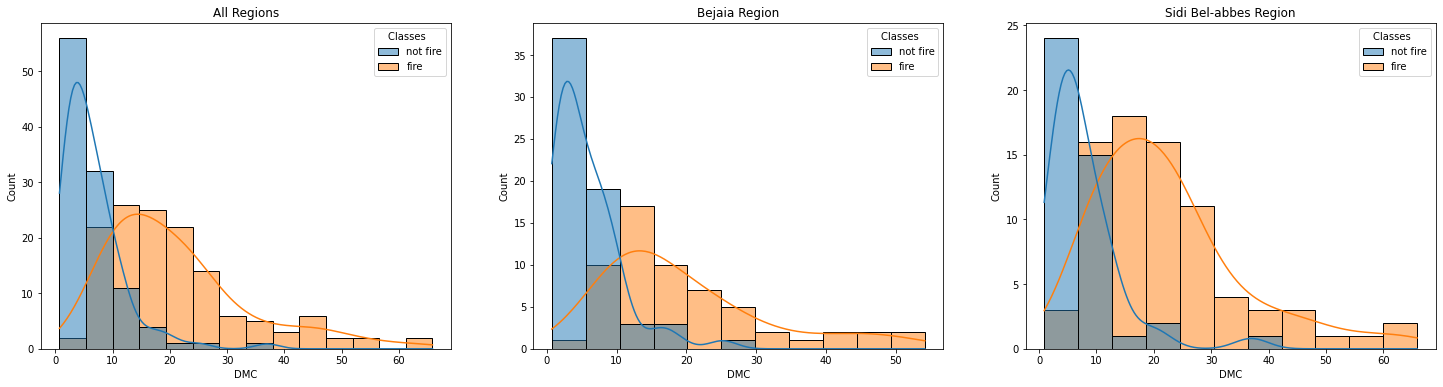




Histogram Plot for : DC



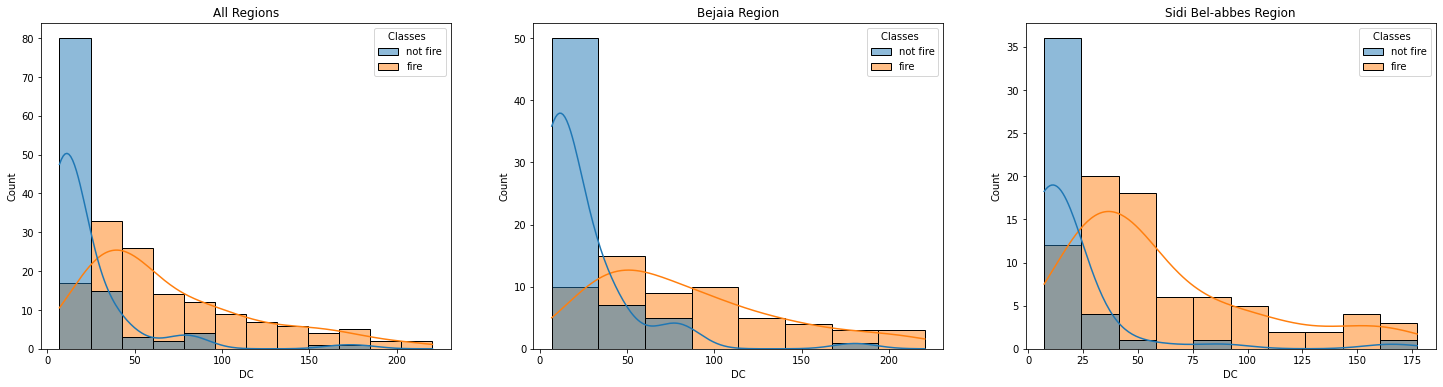




Histogram Plot for : ISI



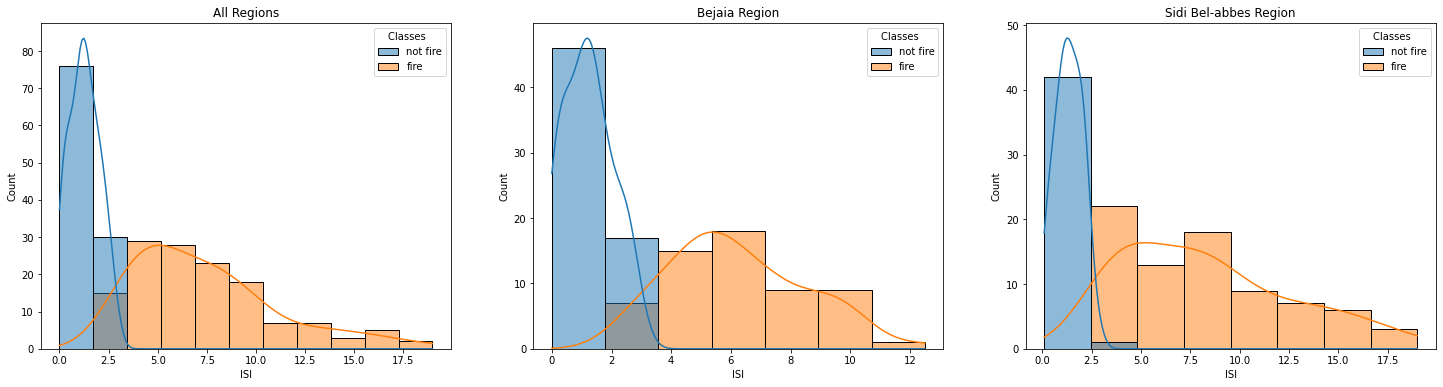




Histogram Plot for : BUI



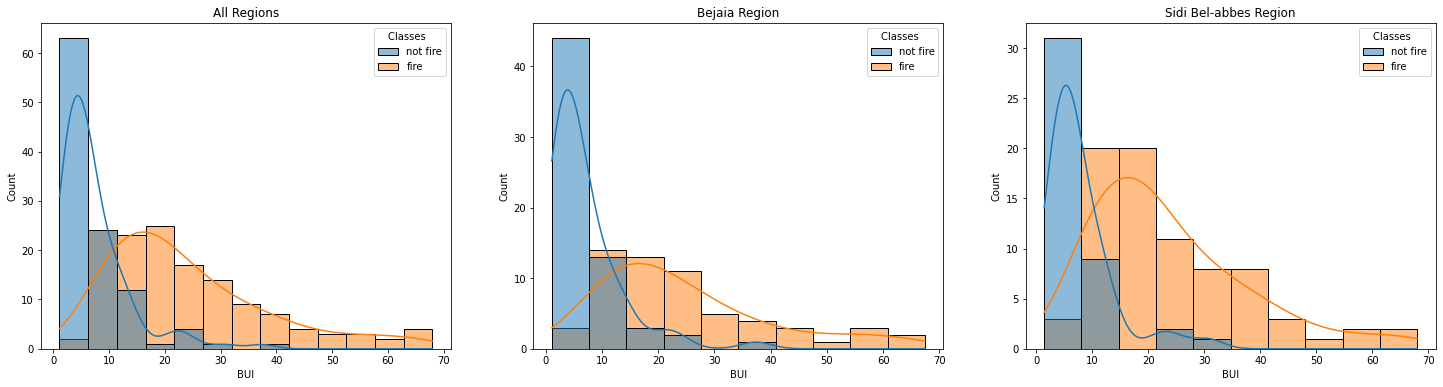




Histogram Plot for : FWI



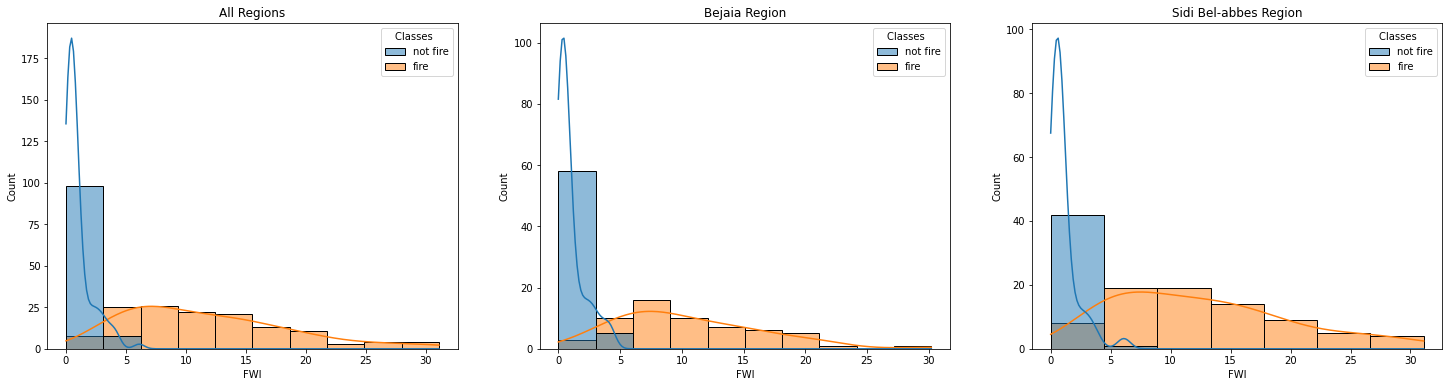

In [34]:
for i in numerical_cols:
    print(f'\nHistogram Plot for : {i}\n')
    create_detailed_histogram(df,feature=i,hue='Classes  ')
    print('\n'+'='*150 + '\n')

In [35]:
df.groupby(by=['region','Classes  ']).mean()

day     month    year  Temperature         RH  \
region         Classes                                                          
Bejaia         fire       18.542373  7.423729  2012.0    32.881356  63.644068   
               not fire   13.142857  7.571429  2012.0    29.587302  72.031746   
Sidi Bel-abbes fire       16.423077  7.602564  2012.0    34.487179  50.948718   
               not fire   14.581395  7.325581  2012.0    30.674419  65.325581   

                                 Ws     Rain        FFMC        DMC  \
region         Classes                                                
Bejaia         fire       15.644068  0.013559  86.579661  19.472881   
               not fire   16.333333  1.619048  63.522222   5.611111   
Sidi Bel-abbes fire       15.076923  0.158974  88.257692  22.246154   
               not fire   14.813953  1.632558  67.941860   7.669767   

                                 DC       ISI        BUI        FWI  
region         Classes                                               
Bejaia         fire       84.516949  6.242373  24.550847  10.537288  
               not fire   23.795238  1.233333   6.880952   0.933333  
Sidi Bel-abbes fire       60.453846  8.316667  23.614103  12.637179  
               not fire   18.853488  1.341860   7.718605   1.009302

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Multivariate Analysis</p>

## Pairplot

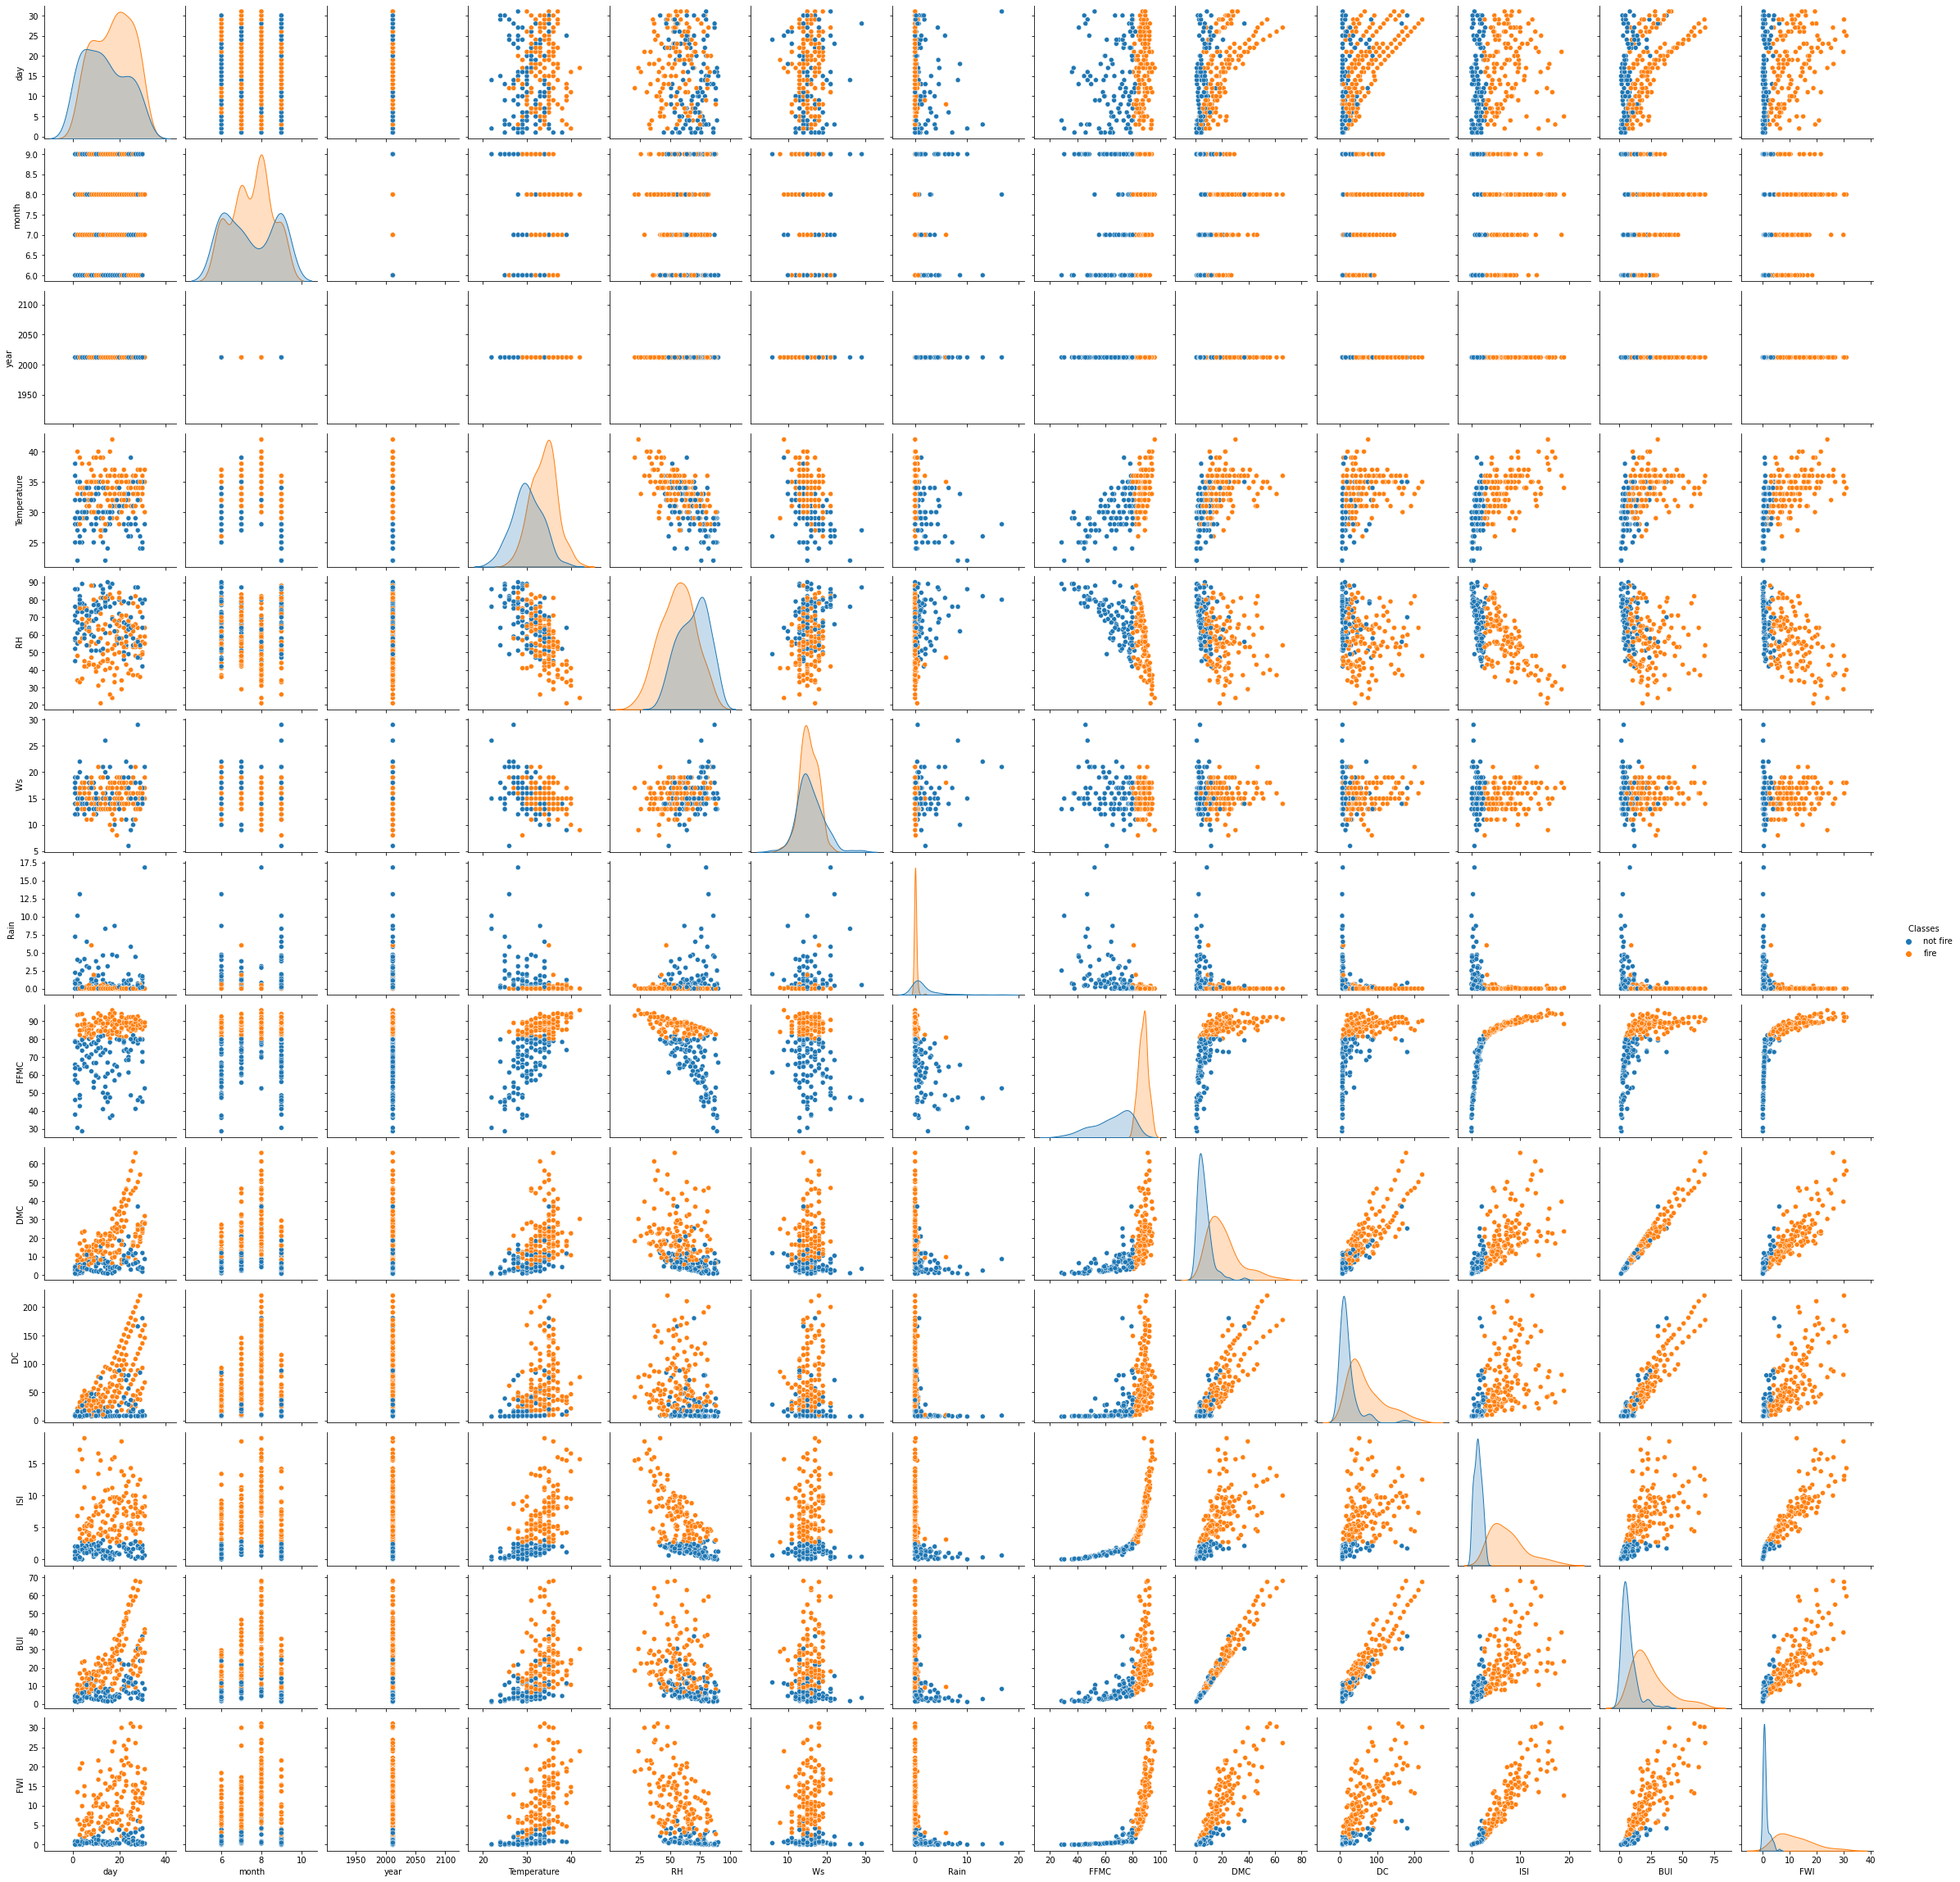

In [36]:
sns.pairplot(df, hue='Classes  ')

## Correlation Heatmap

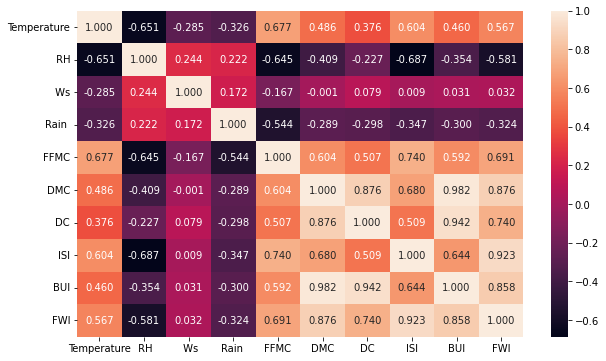

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.3f')
plt.show()

## Boxplot with Classes

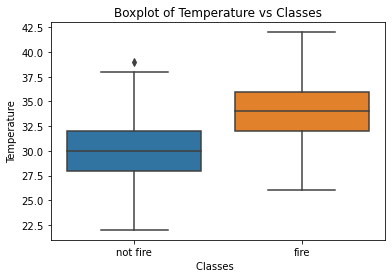

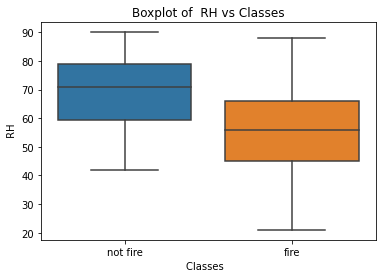

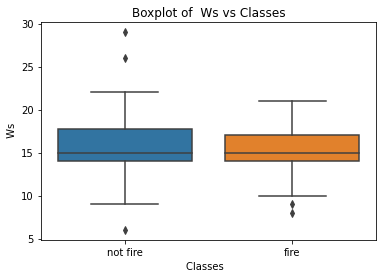

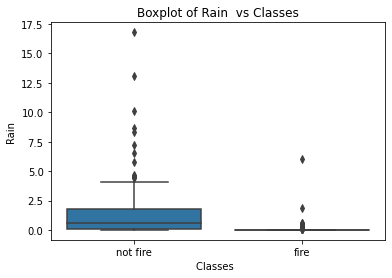

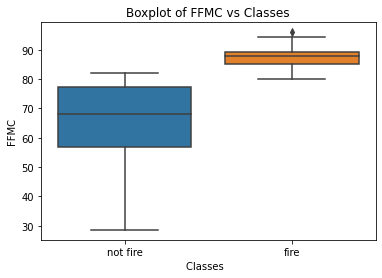

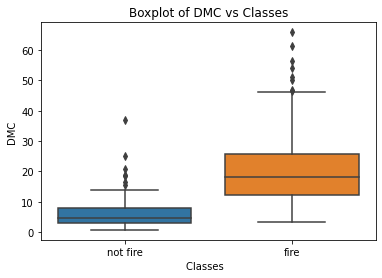

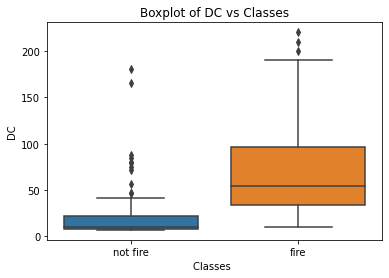

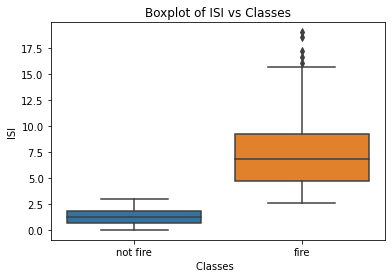

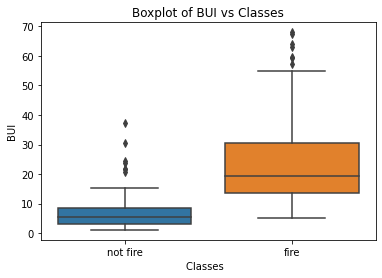

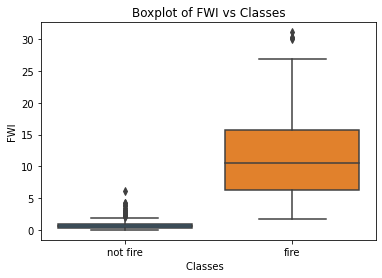

In [45]:
for i in numerical_cols:
  sns.boxplot(data=df,x='Classes  ',y=i)
  plt.title(f'Boxplot of {i} vs Classes')
  print('\n')
  plt.show()

## Boxplot with regions

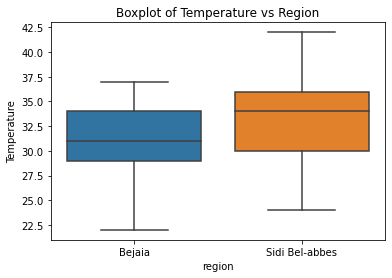

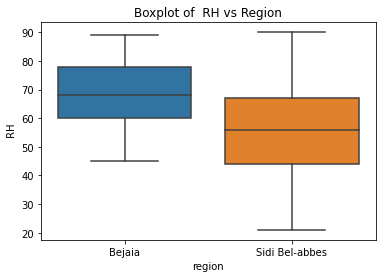

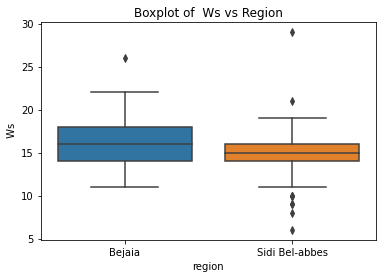

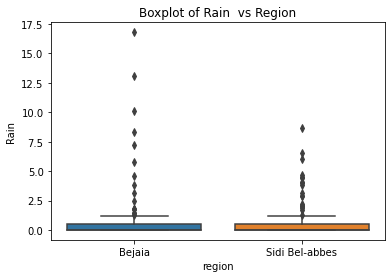

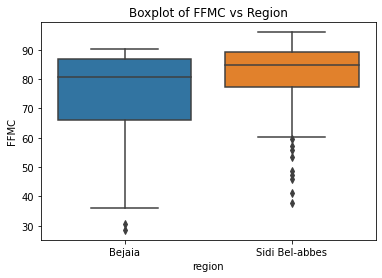

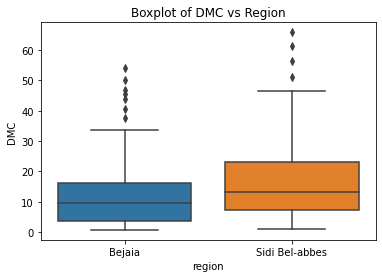

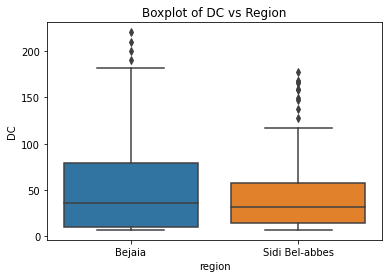

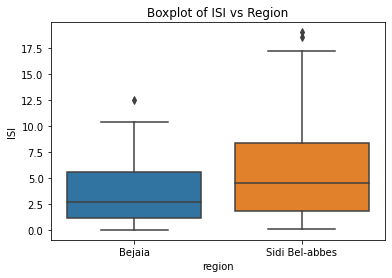

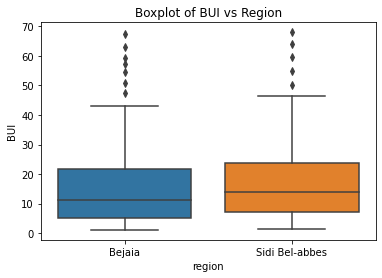

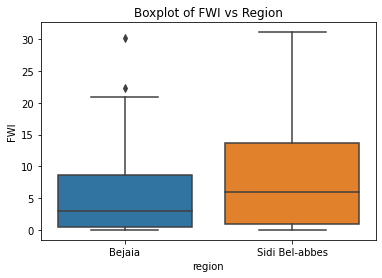

In [47]:
for i in numerical_cols:
  sns.boxplot(data=df,x='region',y=i)
  plt.title(f'Boxplot of {i} vs Region')
  print('\n')
  plt.show()

In [49]:
df.skew(numeric_only=True)

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
 RH           -0.242790
 Ws            0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

## Insights on Data

1. Most fires caused at temperature around 35 degrees Celcius. Temperature is almost Normally distributed 
2. Most Fires occured around RH 40-50. RH Distribution Looks negatively skewed.
3. Most Fires occured around Ws of 15. Ws Distribution is positively skewed.
4. Most Fires occured when there was no rain . Rain is highly positively skewed.
5. Most Fires occured around FFMC 90. FFMC is negatively skewed.
6. Most Fires occured around 10-30 DMC. DMC is positively skewed.
7. Most Fires occured around 40-50 DC. DC is positively skewed.
8. Most Fires occured around 5-7.5 ISI. ISI is positively skewed.
9. Most Fires occured around 20-30 BUI. BUI is positively skewed.
10. Most Fires occured around 5-15 FWI. FWI is positively skewed.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Feature Engineering</p>

## Seperate X and Y

In [52]:
X = df.drop(labels=['Classes  '],axis=1)
Y = df[['Classes  ']]

## Seperate Numeric and Categorical Columns

In [53]:
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)

In [54]:
cat_cols

['region']

In [55]:
num_cols

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

## Get Dummy Columns of 'region' column

In [60]:
X_cat = pd.get_dummies(X[cat_cols])
X_cat.sample(5)

,region_Bejaia,region_Sidi Bel-abbes
179,0,1
62,1,0
208,0,1
37,1,0
79,1,0


## Concatenate Numeric and Categorical Features

In [61]:
X_num = X[num_cols]
X_num.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
115,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7
155,3,7,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2
172,20,7,2012,36,50,16,0.0,89.9,32.7,71.0,9.5,32.6,17.3
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1
229,15,9,2012,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8


In [62]:
X_concat = pd.concat([X_num,X_cat],axis=1)
X_concat.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region_Bejaia,region_Sidi Bel-abbes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_concat,Y,test_size=0.2,random_state=42)

In [64]:
xtrain.shape

(194, 15)

In [65]:
xtest.shape

(49, 15)

## Applying StandardScaler

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [67]:
xtrain.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region_Bejaia,region_Sidi Bel-abbes
0,0.915021,1.359661,0.0,-0.875632,0.213218,1.285770,-0.092069,-0.695683,-0.743420,-0.722758,-0.796488,-0.767910,-0.862753,1.010363,-1.010363
1,1.140865,0.450095,0.0,0.222091,-1.654849,0.145041,-0.380156,1.001200,3.530889,2.329107,1.887575,3.100867,2.937410,-0.989743,0.989743
2,-1.004660,-0.459471,0.0,1.594244,-1.254549,-0.995688,-0.140083,0.490005,-0.168916,-0.317182,-0.194888,-0.242767,-0.285026,-0.989743,0.989743
3,-0.552970,-1.369037,0.0,-0.326771,-1.321266,2.046257,-0.380156,0.887601,0.229407,-0.415564,1.956990,0.043071,1.191389,-0.989743,0.989743
4,0.915021,0.450095,0.0,0.496522,0.146502,-0.615445,-0.380156,0.766902,1.937598,2.411427,0.938897,2.230060,1.730602,1.010363,-1.010363


In [68]:
xtest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region_Bejaia,region_Sidi Bel-abbes
0,1.027943,-1.369037,0.0,-0.326771,0.146502,-0.235202,-0.380156,0.610704,-0.076995,0.253035,0.175328,0.063013,0.125803,1.010363,-1.010363
1,-1.004660,-1.369037,0.0,0.222091,-0.520665,-0.995688,-0.380156,0.717203,-0.406378,-0.415564,0.337297,-0.428893,-0.028258,1.010363,-1.010363
2,-1.682194,-0.459471,0.0,-1.150063,-0.253799,0.905527,0.676162,-1.022280,-0.919601,-0.857281,-0.865904,-0.934094,-0.888430,-0.989743,0.989743
3,0.463331,1.359661,0.0,0.496522,-0.253799,-0.995688,-0.284127,0.099509,0.267707,0.738924,-0.657657,0.468503,-0.464763,-0.989743,0.989743
4,1.140865,1.359661,0.0,-0.601201,0.213218,-0.615445,-0.380156,0.518405,0.060886,-0.134471,-0.102334,-0.030050,-0.118126,-0.989743,0.989743


## Data is now preprocessed and ready for model Training